There is an undirected tree with n nodes labeled from 0 to n - 1, rooted at node 0. You are given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

At every node i, there is a gate. You are also given an array of even integers amount, where amount[i] represents:

    the price needed to open the gate at node i, if amount[i] is negative, or,
    the cash reward obtained on opening the gate at node i, otherwise.

The game goes on as follows:

    Initially, Alice is at node 0 and Bob is at node bob.
    At every second, Alice and Bob each move to an adjacent node. Alice moves towards some leaf node, while Bob moves towards node 0.
    For every node along their path, Alice and Bob either spend money to open the gate at that node, or accept the reward. Note that:
        If the gate is already open, no price will be required, nor will there be any cash reward.
        If Alice and Bob reach the node simultaneously, they share the price/reward for opening the gate there. In other words, if the price to open the gate is c, then both Alice and Bob pay c / 2 each. Similarly, if the reward at the gate is c, both of them receive c / 2 each.
    If Alice reaches a leaf node, she stops moving. Similarly, if Bob reaches node 0, he stops moving. Note that these events are independent of each other.

Return the maximum net income Alice can have if she travels towards the optimal leaf node.

 

Example 1:

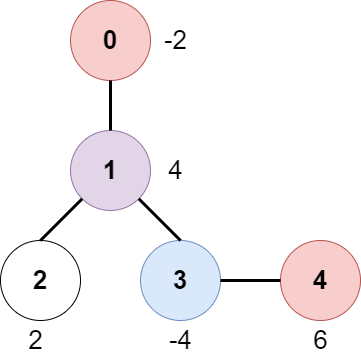

Input: edges = [[0,1],[1,2],[1,3],[3,4]], bob = 3, amount = [-2,4,2,-4,6]
Output: 6
Explanation: 
The above diagram represents the given tree. The game goes as follows:
- Alice is initially on node 0, Bob on node 3. They open the gates of their respective nodes.
  Alice's net income is now -2.
- Both Alice and Bob move to node 1. 
  Since they reach here simultaneously, they open the gate together and share the reward.
  Alice's net income becomes -2 + (4 / 2) = 0.
- Alice moves on to node 3. Since Bob already opened its gate, Alice's income remains unchanged.
  Bob moves on to node 0, and stops moving.
- Alice moves on to node 4 and opens the gate there. Her net income becomes 0 + 6 = 6.
Now, neither Alice nor Bob can make any further moves, and the game ends.
It is not possible for Alice to get a higher net income.

Example 2:

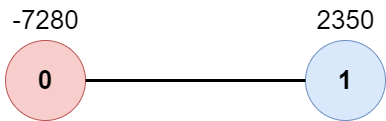

Input: edges = [[0,1]], bob = 1, amount = [-7280,2350]
Output: -7280
Explanation: 
Alice follows the path 0->1 whereas Bob follows the path 1->0.
Thus, Alice opens the gate at node 0 only. Hence, her net income is -7280. 

 

Constraints:

    2 <= n <= 105
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai, bi < n
    ai != bi
    edges represents a valid tree.
    1 <= bob < n
    amount.length == n
    amount[i] is an even integer in the range [-104, 104].



In [ ]:
class Solution:
    def mostProfitablePath(self, edges: List[List[int]], bob: int, amount: List[int]) -> int:
        if not edges:
            return amount[0] // 2
    
        self.ans = float("-inf")
        self.bob_path = []
        self.graph = defaultdict(list)
        self.is_leaf = [False] * (len(edges) + 1)
        for i, j in edges:
            self.graph[i].append(j)
            self.graph[j].append(i)
        
        def dfs(curr, prev, path):
            path.append(curr)
            if curr == bob:
                self.bob_path = path.copy()
            for nxt in self.graph[curr]:
                if nxt != prev:
                    dfs(nxt, curr, path)
            if (len(self.graph[curr]) == 1 and self.graph[curr][0] == prev):
                self.is_leaf[curr] = True
            path.pop()

        dfs(0, None, [])

        q = deque()
        q.append((0, None, 0))
        while q:
            i = len(q)
            if self.bob_path:
                bobs_current = self.bob_path.pop()
            amount[bobs_current] //= 2
            for _ in range(i):
                curr, prev, money = q.popleft()
                money += amount[curr]
                if self.is_leaf[curr]:
                    self.ans = max(self.ans, money)
                else:
                    for nxt in self.graph[curr]:
                        if nxt != prev:
                            q.append((nxt, curr, money))
            amount[bobs_current] = 0
        return self.ans